# Part Ⅰ  Analyzing the questions below: 
## 1. Dose the Industry Net Migration Rate affect the Industry Employment Growth Rate? 
### Hypothesis: As the Industry Net Immigration Rate increases, the Employment Growth Rate of the industry will also rise. (2015 - 2018)
## 2. Is the trend of Industry Net Immigration Rate similar between China and the United States? (2015 - 2018)
## 3. Is the trend of Industry Employment Growth Rate similar between China and the United States? (2015 - 2018)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data preparation and clearning: 

In [2]:
industry_migration = pd.read_excel("/Users/apple/Downloads/public_use-talent-migration.xlsx", 
                                   sheet_name='Industry Migration')



In [3]:
industry_migration = industry_migration[["country_name","isic_section_name",
                                         "industry_name","net_per_10K_2015","net_per_10K_2018"]]
industry_migration = industry_migration.loc[industry_migration['country_name'].isin(['United States','China'])]
industry_migration


,country_name,isic_section_name,industry_name,net_per_10K_2015,net_per_10K_2018
1049,China,Manufacturing,Defense & Space,-40.96,-570.75
1050,China,Information and communication,Computer Hardware,13.38,20.37
1051,China,Information and communication,Computer Software,-30.67,-8.68
1052,China,Information and communication,Computer Networking,-71.00,-70.04
1053,China,Information and communication,Internet,94.51,27.04
1054,China,Information and communication,Semiconductors,3.25,19.35
1055,China,Information and communication,Telecommunications,31.47,29.21
1056,China,Professional scientific and technical activities,Law Practice,63.12,-19.31
1057,China,Professional scientific and technical activities,Legal Services,122.72,46.88
1058,China,Professional scientific and technical activities,Management Consulting,26.42,40.86


In [4]:
employment_growth = pd.read_excel("/Users/apple/Downloads/public_use-industry-employment-growth.xlsx", 
                                  sheet_name='Growth from Industry Transition')



In [5]:
employment_growth = employment_growth[["country_name","isic_section_name",
                                       "industry_name","growth_rate_2015","growth_rate_2018"]]
employment_growth = employment_growth.loc[employment_growth['country_name'].isin(['United States','China'])]
employment_growth


,country_name,isic_section_name,industry_name,growth_rate_2015,growth_rate_2018
1312,China,Mining and quarrying,Mining & Metals,-0.011324,-0.002684
1313,China,Mining and quarrying,Oil & Energy,-0.021762,-0.009184
1314,China,Manufacturing,Pharmaceuticals,-0.003943,0.002292
1315,China,Manufacturing,Food Production,-0.010824,-0.003356
1316,China,Manufacturing,Aviation & Aerospace,-0.026768,-0.009077
1317,China,Manufacturing,Automotive,0.002317,0.002376
1318,China,Manufacturing,Chemicals,-0.007558,-0.002072
1319,China,Manufacturing,Machinery,-0.008087,-0.001922
1320,China,Manufacturing,Shipbuilding,-0.050826,-0.000705
1321,China,Manufacturing,Textiles,-0.004282,-0.001803


#### Merge two dataset and remove null values.

In [6]:
result_df = pd.merge(industry_migration, employment_growth, on=['country_name',
                                                                'isic_section_name','industry_name'],how = 'right')

result_df = result_df[pd.notnull(result_df['net_per_10K_2015'])]
result_df = result_df[pd.notnull(result_df['net_per_10K_2018'])]

result_df = result_df[pd.notnull(result_df['growth_rate_2015'])]
result_df = result_df[pd.notnull(result_df['growth_rate_2018'])]



#### Changing these column names and make them more meaningful. 
#### For the net migration data, getting the same data form (decimal) as employment growth rate.

In [7]:
result_df.columns = ['country_name', 'industry_classification','industry_name','net_migration_2015',
                     'net_migration_2018','employment_growth_rate_2015','employment_growth_rate_2018']


result_df['net_migration_2015'] /= 10000
result_df['net_migration_2018'] /= 10000

result_df

,country_name,industry_classification,industry_name,net_migration_2015,net_migration_2018,employment_growth_rate_2015,employment_growth_rate_2018
0,China,Information and communication,Computer Hardware,0.001338,0.002037,-0.006137,-0.005238
1,China,Information and communication,Computer Software,-0.003067,-0.000868,-0.006721,0.001793
2,China,Information and communication,Computer Networking,-0.007100,-0.007004,-0.043882,-0.018693
3,China,Information and communication,Internet,0.009451,0.002704,0.037827,0.019623
4,China,Information and communication,Semiconductors,0.000325,0.001935,-0.005680,0.001028
5,China,Information and communication,Telecommunications,0.003147,0.002921,-0.011120,-0.004438
6,China,Professional scientific and technical activities,Law Practice,0.006312,-0.001931,-0.012133,-0.015665
7,China,Professional scientific and technical activities,Legal Services,0.012272,0.004688,0.002558,-0.007498
8,China,Professional scientific and technical activities,Management Consulting,0.002642,0.004086,0.003725,0.006547
9,China,Professional scientific and technical activities,Biotechnology,0.010196,0.006339,0.008771,0.026747


### Finding the different industry names, which were included in each industry classification.

In [8]:

industry_name = result_df[["industry_classification","industry_name","country_name"]]

industry_name = industry_name.loc[industry_name['country_name'] == 'China']

industry_name = industry_name[["industry_name", "industry_classification"]]


industry_name = industry_name.groupby(['industry_classification'])

for name,group in industry_name:
   print() 
   print(name)
   print()
   print(group['industry_name'])




Arts, entertainment and recreation 

12                 Entertainment
13                        Sports
16                      Fine Art
48                 Arts & Crafts
51                         Music
56    Health, Wellness & Fitness
Name: industry_name, dtype: object

Financial and insurance activities

17                             Banking
18                           Insurance
19                  Financial Services
20                  Investment Banking
21               Investment Management
44    Venture Capital & Private Equity
58                     Capital Markets
Name: industry_name, dtype: object

Information and communication

0                     Computer Hardware
1                     Computer Software
2                   Computer Networking
3                              Internet
4                        Semiconductors
5                    Telecommunications
14               Motion Pictures & Film
15                      Broadcast Media
35                           New

### Group by country name and industry classification to get data from the same industry classification but under different countries (China & United States). 

In [9]:
result_df=result_df.groupby(['country_name','industry_classification'])[['net_migration_2015',
                     'net_migration_2018','employment_growth_rate_2015','employment_growth_rate_2018']].sum()
result_df


net_migration_2015  \
country_name  industry_classification                                                
China         Arts, entertainment and recreation                          0.110123   
              Financial and insurance activities                          0.095654   
              Information and communication                              -0.008147   
              Manufacturing                                               0.039942   
              Mining and quarrying                                       -0.002736   
              Professional scientific and technical activities            0.083851   
United States Arts, entertainment and recreation                          0.010011   
              Financial and insurance activities                          0.016542   
              Information and communication                               0.081082   
              Manufacturing                                              -0.034200   
              Mining and quarrying                                       -0.011950   
              Professional scientific and technical activities            0.034300   

                                                                net_migration_2018  \
country_name  industry_classification                                                
China         Arts, entertainment and recreation                          0.007572   
              Financial and insurance activities                          0.024600   
              Information and communication                              -0.027813   
              Manufacturing                                               0.011234   
              Mining and quarrying                                       -0.004829   
              Professional scientific and technical activities            0.052126   
United States Arts, entertainment and recreation                          0.002976   
              Financial and insurance activities                          0.003612   
              Information and communication                               0.030167   
              Manufacturing                                              -0.012750   
              Mining and quarrying                                       -0.000973   
              Professional scientific and technical activities            0.017707   

                                                                employment_growth_rate_2015  \
country_name  industry_classification                                                         
China         Arts, entertainment and recreation                                   0.076419   
              Financial and insurance activities                                   0.299792   
              Information and communication                                       -0.209215   
              Manufacturing                                                       -0.141461   
              Mining and quarrying                                                -0.033086   
              Professional scientific and technical activities                    -0.283419   
United States Arts, entertainment and recreation                                  -0.029709   
              Financial and insurance activities                                   0.123716   
              Information and communication                                        0.267868   
              Manufacturing                                                        0.148156   
              Mining and quarrying                                                -0.037176   
              Professional scientific and technical activities                     0.189232   

                                                                employment_growth_rate_2018  
country_name  industry_classification                                                        
China         Arts, entertainment and recreation                                   0.055521  
              Financial and insurance act

### Creating Bar graph: 

In [10]:
def bar_graph(lable_1, lable_2, color_1, color_2, lable_1_name, lable_2_name, ylabel_name, title_name):

    n_groups = 6
    lable_net_or_em_1 = lable_1
    lable_net_or_em_2 = lable_2

  
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.38
    opacity = 0.8

    rects1 = plt.bar(index, lable_net_or_em_1, bar_width,
    alpha=opacity,
    color = color_1,                 

    label = lable_1_name)                 


    rects2 = plt.bar(index + bar_width, lable_net_or_em_2, bar_width,
    alpha=opacity,
    color =color_2,                 

    label = lable_2_name)


    plt.xlabel('Industry Classification')

    plt.ylabel(ylabel_name)
    plt.title(title_name)

                     
    plt.xticks(index + bar_width, ('AER', 'FIA', 'IC', 'M','MQ','PSTA'))
    plt.legend()

    plt.tight_layout()
    plt.show()

    


#### Creating different data bars:

In [11]:
China_net_2015=tuple(result_df.groupby('country_name').get_group('China')['net_migration_2015'].tolist())
China_net_2018=tuple(result_df.groupby('country_name').get_group('China')['net_migration_2018'].tolist())


In [12]:
US_net_2015=tuple(result_df.groupby('country_name').get_group('United States')['net_migration_2015'].tolist())
US_net_2018=tuple(result_df.groupby('country_name').get_group('United States')['net_migration_2018'].tolist())


In [13]:
China_em_2015=tuple(result_df.groupby('country_name').get_group('China')['employment_growth_rate_2015'].tolist())
China_em_2018=tuple(result_df.groupby('country_name').get_group('China')['employment_growth_rate_2018'].tolist())


In [14]:
US_em_2015=tuple(result_df.groupby('country_name').get_group('United States')['employment_growth_rate_2015'].tolist())
US_em_2018=tuple(result_df.groupby('country_name').get_group('United States')['employment_growth_rate_2018'].tolist())


### Bar graph of 'Comparison of Industry Net Migration Rate of China in 2015 and 2018'

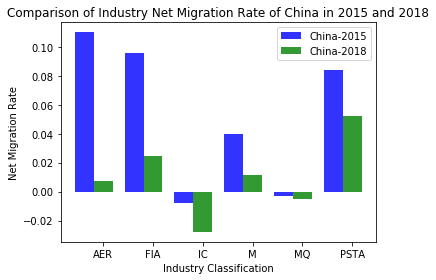

In [15]:
bar_graph(China_net_2015, China_net_2018, 'b', 'g', 'China-2015', 
          'China-2018', 'Net Migration Rate', 
          'Comparison of Industry Net Migration Rate of China in 2015 and 2018')


### Bar graph of 'Comparison of Industry Net Migration Rate of United States in 2015 and 2018'

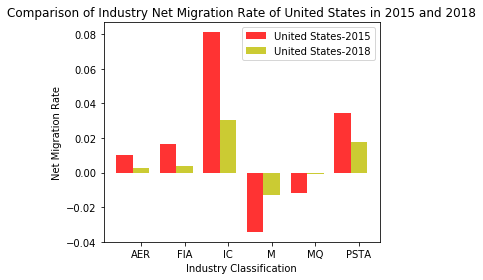

In [16]:
bar_graph(US_net_2015, US_net_2018, 'r', 'y', 'United States-2015', 
          'United States-2018', 'Net Migration Rate', 
          'Comparison of Industry Net Migration Rate of United States in 2015 and 2018')


### Bar graph of 'Comparison of Industry Employment Growth Rate of China in 2015 and 2018'

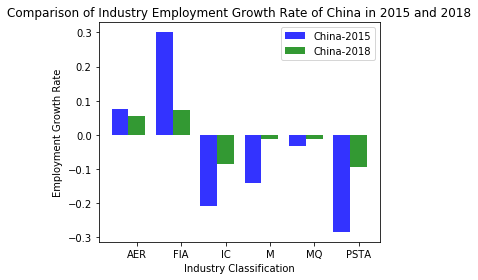

In [17]:
bar_graph(China_em_2015, China_em_2018, 'b', 'g', 'China-2015', 
          'China-2018', 'Employment Growth Rate', 
          'Comparison of Industry Employment Growth Rate of China in 2015 and 2018')


### Bar graph of 'Comparison of Industry Employment Growth Rate of United States in 2015 and 2018'

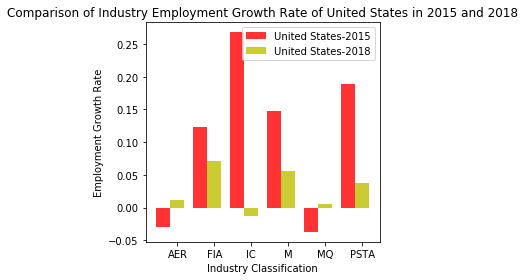

In [18]:
bar_graph(US_em_2015, US_em_2018, 'r', 'y', 'United States-2015', 
          'United States-2018', 'Employment Growth Rate', 
          'Comparison of Industry Employment Growth Rate of United States in 2015 and 2018')
